In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [3]:
data='/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv'
df=pd.read_csv(data)

# Exploratory Data Analysis

### check shape of the dataset

In [4]:
df.shape

(7050, 16)

### preview the dataset

In [5]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## view summary of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

### check for missing values in dataset

In [7]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

### Drop redundant columns

In [12]:
df.drop(['Column1','Column2','Column3','Column4'],axis=1, inplace=True)

### Again view summary of dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


#### Now,we can see that redundant columns have been removed from the dataset
we can see that there are 3 character variable (datatype=object) and remaining 9 numerical variables(data type=int64)

### view the statistical summary of numerical variables

In [14]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


### There are 3categorical variables in the dataset . I will explore them one by one

In [15]:
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [16]:
len(df['status_id'].unique())

6997

### Explore status_published variable

In [17]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

### view how many different types of variables are there

In [18]:
len(df['status_published'].unique())

6913

### Explore status_type variable

In [19]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [20]:
len(df['status_type'].unique())

4

### drop status_id and status_published variable from the dataset

In [21]:
df.drop(['status_id','status_published'],axis=1,inplace=True)

### View the summary of dataset again

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [23]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


### we can see that there is 1 non-nuclear column status_type in the dataset .i will convert it into integer equivalent

### 9 Declare feature vector and target variable

In [24]:
x=df
y=df['status_type']

# 10.Convert categorical variable into integers

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['status_type']=le.fit_transform(x['status_type'])
y=le.transform(y)

### view the summary of x

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [29]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


### 11.Feature Scaling

In [30]:
cols=x.columns

In [31]:
from sklearn.preprocessing import MinMaxScaler

ms=MinMaxScaler()
x=ms.fit_transform(x)

In [32]:
x=pd.DataFrame(x,columns=[cols])

In [33]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# 12 K-Means model with two cluster

In [34]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(x)

KMeans(n_clusters=2, random_state=0)

# 13 K-Means Model parameters study

In [35]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

In [36]:
kmeans.inertia_

237.75726404419564

# 14 Check quality of weak classification by the model

In [37]:
labels=kmeans.labels_
correct_labels=sum(y==labels)
print("Result : %d out of %d samples were correctly labeled."%(correct_labels,y.size))

Result : 63 out of 7050 samples were correctly labeled.


In [38]:
print('Accuracy score:{0:0.2f}'.format(correct_labels/float(y.size)))

Accuracy score:0.01


# we have achieved a weak classification accuracy of 1% by our unsupervised model

### 15 .use elbow method to find optimal number of cluster

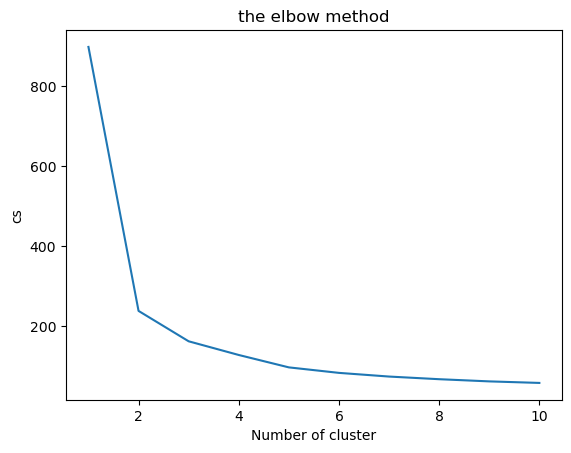

In [41]:
from sklearn.cluster import KMeans
cs=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
    
plt.plot(range(1,11),cs)
plt.title('the elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('cs')
plt.show()

In [44]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(x)

labels=kmeans.labels_

correct_labels=sum(y==labels)
print("Result : %d out of %d samples were"%(correct_labels,y.size))

print('Accuracy score:{0:0.2f}'.format(correct_labels/float(y.size)))

Result : 63 out of 7050 samples were
Accuracy score:0.01


In [46]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(x)

labels=kmeans.labels_

correct_labels=sum(y==labels)
print("result: %d out of %d samples were correctly labeled."%(correct_labels,y.size))
print('Accuracy score:{0:0.2f}'.format(correct_labels/float(y.size)))

result: 138 out of 7050 samples were correctly labeled.
Accuracy score:0.02


# K-Means model with 4 clusters

In [47]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(x)

labels=kmeans.labels_

correct_labels=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled."%(correct_labels,y.size))
print('Accuracy score:{0:0.2f}'.format(correct_labels/float(y.size)))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score:0.62


# 17. Results and conclusion 

### In this project, I have implemented the most popular unsupervised clustering technique called K-Means Clustering.

I have applied the elbow method and find that k=2 (k is number of clusters) can be considered a good number of cluster to cluster this data.

I have find that the model has very high inertia of 237.7572. So, this is not a good model fit to the data.

I have achieved a weak classification accuracy of 1% with k=2 by our unsupervised model.

So, I have changed the value of k and find relatively higher classification accuracy of 62% with k=4.

Hence, we can conclude that k=4 being the optimal number of clusters.